In [159]:
import pandas as pd
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import shutil

print(tf.__version__)

2.12.0


In [160]:
!ls drive/MyDrive/data_ml

charts.zip


In [161]:
!rm -rf /content/charts

In [162]:
!unzip drive/MyDrive/data_ml/charts.zip

Archive:  drive/MyDrive/data_ml/charts.zip
   creating: charts/
   creating: charts/test/
  inflating: charts/test/0.png       
  inflating: charts/test/1.png       
  inflating: charts/test/10.png      
  inflating: charts/test/11.png      
 extracting: charts/test/12.png      
 extracting: charts/test/13.png      
  inflating: charts/test/14.png      
  inflating: charts/test/15.png      
  inflating: charts/test/16.png      
  inflating: charts/test/17.png      
  inflating: charts/test/18.png      
  inflating: charts/test/19.png      
  inflating: charts/test/2.png       
  inflating: charts/test/20.png      
  inflating: charts/test/21.png      
  inflating: charts/test/22.png      
  inflating: charts/test/23.png      
  inflating: charts/test/24.png      
  inflating: charts/test/25.png      
  inflating: charts/test/26.png      
  inflating: charts/test/27.png      
  inflating: charts/test/28.png      
  inflating: charts/test/29.png      
  inflating: charts/test/3.png      

In [163]:
!ls charts

test  train_val  train_val.csv


In [164]:
import os
import pandas as pd

data_dir = 'charts/train_val/'
label_df = pd.read_csv('/content/charts/train_val.csv')

# Create a dictionary mapping image index to its corresponding label
label_dict = dict(zip(label_df['image_index'], label_df['type']))

# Get a list of all files in the data_dir directory
file_list = os.listdir(data_dir)

# Initialize an empty list for labels
label_list = []

# Get the label list for each file
for file in file_list:
    image_index = int(file.split('.')[0])  # Extract image index from filename
    label = label_dict.get(image_index, None)  # Get label from the dictionary
    label_list.append(label)  # Add label to the list

In [165]:
label_df.type

0      vbar_categorical
1      vbar_categorical
2      vbar_categorical
3      vbar_categorical
4      vbar_categorical
             ...       
995            dot_line
996            dot_line
997            dot_line
998            dot_line
999            dot_line
Name: type, Length: 1000, dtype: object

In [166]:
images[0]

'10.png'

In [167]:
label_dict[41]

'vbar_categorical'

In [168]:
def get_label(filenm):
  return filenm.split('.png')[0]

images=os.listdir('/content/charts/train_val/')
path = '/content/charts/train_val/'
n_path = '/content/images'

for image in images:
  if os.path.exists(os.path.join(path,image)):
    #print(os.path.join(path,get_label(image)))
    #print(image)
    lebel=label_dict[int(get_label(image))]
    if not os.path.exists(os.path.join(n_path,lebel)):      
      os.makedirs(os.path.join(n_path,lebel))
    shutil.copy(os.path.join(path,image),os.path.join(n_path, lebel,image))


In [169]:
#!rm -rf /content/images

In [170]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [183]:
import pathlib
data_dir = pathlib.Path('/content/images').with_suffix('')

In [184]:
batch_size = 32
img_height = 128
img_width = 128

In [185]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  validation_split=0.2,
  subset="training")

Found 1000 files belonging to 5 classes.
Using 800 files for training.


In [186]:
validation_data = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  validation_split=0.2,
  subset="validation")

Found 1000 files belonging to 5 classes.
Using 200 files for validation.


In [187]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [188]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [189]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [190]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [191]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
25/25 [==============================] - 17s 639ms/step - loss: 4.5470 - accuracy: 0.3088 - val_loss: 1.2144 - val_accuracy: 0.6118
Epoch 2/5
25/25 [==============================] - 17s 700ms/step - loss: 0.9047 - accuracy: 0.7550 - val_loss: 0.6670 - val_accuracy: 0.7632
Epoch 3/5
25/25 [==============================] - 15s 621ms/step - loss: 0.5021 - accuracy: 0.8075 - val_loss: 0.4372 - val_accuracy: 0.7829
Epoch 4/5
25/25 [==============================] - 15s 616ms/step - loss: 0.3394 - accuracy: 0.8650 - val_loss: 0.3286 - val_accuracy: 0.8947
Epoch 5/5
25/25 [==============================] - 16s 626ms/step - loss: 0.2673 - accuracy: 0.9137 - val_loss: 0.2911 - val_accuracy: 0.8421


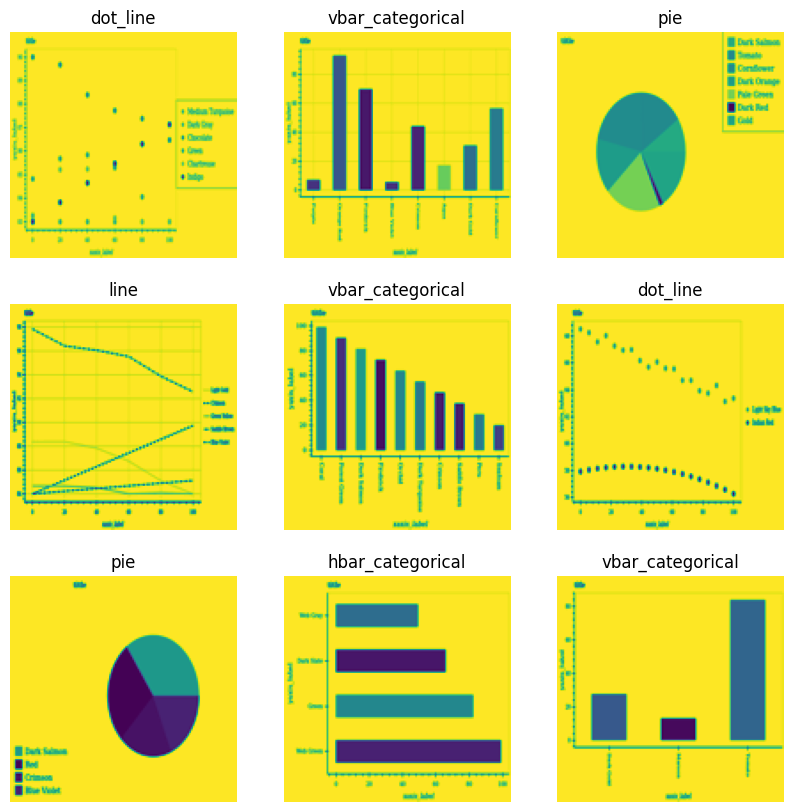

In [192]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [193]:
def get_label(filenm):
  return filenm.split('.png')[0]

images=os.listdir('/content/charts/test/')
path = '/content/charts/test/'
n_path = '/content/images_test'

for image in images:
  if os.path.exists(os.path.join(path,image)):
    #print(os.path.join(path,get_label(image)))
    #print(image)
    lebel=label_dict[int(get_label(image))]
    print(lebel,' ',get_label(image))

    if not os.path.exists(os.path.join(n_path,lebel)):      
      os.makedirs(os.path.join(n_path,lebel))
    shutil.copy(os.path.join(path,image),os.path.join(n_path, lebel,image))


vbar_categorical   10
vbar_categorical   32
vbar_categorical   28
vbar_categorical   27
vbar_categorical   7
vbar_categorical   1
vbar_categorical   14
vbar_categorical   22
vbar_categorical   41
vbar_categorical   33
vbar_categorical   18
vbar_categorical   29
vbar_categorical   5
vbar_categorical   48
vbar_categorical   36
vbar_categorical   3
vbar_categorical   15
vbar_categorical   16
vbar_categorical   39
vbar_categorical   4
vbar_categorical   30
vbar_categorical   23
vbar_categorical   17
vbar_categorical   43
vbar_categorical   11
vbar_categorical   47
vbar_categorical   9
vbar_categorical   37
vbar_categorical   24
vbar_categorical   2
vbar_categorical   40
vbar_categorical   38
vbar_categorical   20
vbar_categorical   34
vbar_categorical   8
vbar_categorical   13
vbar_categorical   26
vbar_categorical   31
vbar_categorical   35
vbar_categorical   25
vbar_categorical   0
vbar_categorical   6
vbar_categorical   21
vbar_categorical   46
vbar_categorical   45
vbar_categorical   1

In [194]:
data_dir_test = pathlib.Path('/content/images_test').with_suffix('')

In [195]:
data_dir_test = tf.keras.utils.image_dataset_from_directory(
  data_dir_test,
  color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
)

Found 50 files belonging to 1 classes.


In [196]:
test_loss, test_acc = model.evaluate(data_dir_test, verbose=2)

print('\nTest accuracy:', test_acc)

2/2 - 0s - loss: 4.5264 - accuracy: 0.0600 - 248ms/epoch - 124ms/step

Test accuracy: 0.05999999865889549


In [ ]:
# Referance: 
# https://www.tensorflow.org/guide/data#decoding_image_data_and_resizing_it
# https://stackoverflow.com/questions/71047609/what-is-the-best-way-of-converting-a-large-folder-of-bmp-files-to-jpeg
# https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/load_data/images.ipynb#scrollTo=S08ZKKODsnGW